In [393]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import fbeta_score
from keras.models import Sequential, Model
from keras.layers import Dense, BatchNormalization, Dropout, Input
from keras.callbacks import EarlyStopping, LambdaCallback
from keras.initializers import glorot_normal, he_normal, orthogonal
%matplotlib inline  
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,9]
from time import time
from sklearn import manifold
from matplotlib.ticker import NullFormatter
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn import svm

In [394]:
def load_features(features_dir):
    features_train = np.load(os.path.join(features_dir, 'train_features.npy'))
    features_valid = np.load(os.path.join(features_dir, 'val_features.npy'))
    Y_train = np.load(os.path.join(features_dir, 'train_labels.npy'))
    Y_valid = np.load(os.path.join(features_dir, 'val_labels.npy'))
    return features_train, features_valid, Y_train, Y_valid

In [395]:
features_dir = 'features/starter1_128_9155'
# features_dir = 'features/linear1024_avg_sig_44_0.11'
features_train, features_valid, Y_train, Y_valid = load_features(features_dir)
print("features_train %s, Y_train %s" % (features_train.shape, Y_train.shape))
print("features_valid %s, Y_valid %s" % (features_valid.shape, Y_valid.shape))

features_train (32383, 2048), Y_train (32383, 17)
features_valid (8096, 2048), Y_valid (8096, 17)


In [396]:
df_train = pd.read_csv('inputs/train_v2.csv')
df_train.head(2)
flatten = lambda l: [item for sublist in l for item in sublist]
labels = list(set(flatten([l.split(' ') for l in df_train['tags'].values])))

label_map = {l: i for i, l in enumerate(labels)}
inv_label_map = {i: l for l, i in label_map.items()}
print(labels)

['slash_burn', 'clear', 'blooming', 'primary', 'cloudy', 'conventional_mine', 'water', 'haze', 'cultivation', 'partly_cloudy', 'artisinal_mine', 'habitation', 'bare_ground', 'blow_down', 'agriculture', 'road', 'selective_logging']


In [397]:
# water = 6
# road = 15
# print(len(Y_train[(Y_train[:,water] == 1) | (Y_train[:,road] == 1)]))
# print(len(Y_train[(Y_train[:,water] == 1) & (Y_train[:,road] == 1)]))

In [398]:
# Y_train_wr = np.empty((Y_train.shape[0], Y_train.shape[1]+1))
# Y_train_wr[:,:-1] = Y_train
# Y_train_wr[:,-2] = ((Y_train[:,water] == 1) | (Y_train[:,road] == 1)).astype(int)
# Y_train_wr[:,-1] = ((Y_train[:,water] == 1) | (Y_train[:,road] == 1)).astype(int)

In [399]:
# Y_valid_wr = np.empty((Y_valid.shape[0], Y_valid.shape[1]+1))
# Y_valid_wr[:,:-1] = Y_valid
# Y_valid_wr[:,-2] = ((Y_valid[:,water] == 1) | (Y_valid[:,road] == 1)).astype(int)
# Y_valid_wr[:,-1] = ((Y_valid[:,water] == 1) | (Y_valid[:,road] == 1)).astype(int)

In [400]:
model = Sequential()
model.add(Dense(1024, activation='relu', kernel_initializer=he_normal(seed=0), input_shape=(features_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(17, activation='sigmoid', kernel_initializer=he_normal(seed=0)))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# model.summary()

Train on 32383 samples, validate on 8096 samples
Epoch 1/50
3s - loss: 0.5172 - acc: 0.7768 - val_loss: 0.2831 - val_acc: 0.9437
Epoch 2/50
2s - loss: 0.1821 - acc: 0.9501 - val_loss: 0.1213 - val_acc: 0.9611
Epoch 3/50
2s - loss: 0.1138 - acc: 0.9606 - val_loss: 0.1131 - val_acc: 0.9621
Epoch 4/50
2s - loss: 0.1028 - acc: 0.9629 - val_loss: 0.1113 - val_acc: 0.9629
Epoch 5/50
2s - loss: 0.0985 - acc: 0.9641 - val_loss: 0.1092 - val_acc: 0.9623
Epoch 6/50
2s - loss: 0.0957 - acc: 0.9647 - val_loss: 0.1122 - val_acc: 0.9631
Epoch 7/50
2s - loss: 0.0939 - acc: 0.9654 - val_loss: 0.1084 - val_acc: 0.9631
Epoch 8/50
2s - loss: 0.0921 - acc: 0.9658 - val_loss: 0.1065 - val_acc: 0.9630
Epoch 9/50


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


2s - loss: 0.0912 - acc: 0.9661 - val_loss: 0.1060 - val_acc: 0.9633
Epoch 10/50
2s - loss: 0.0902 - acc: 0.9663 - val_loss: 0.1069 - val_acc: 0.9633
Epoch 11/50
2s - loss: 0.0889 - acc: 0.9668 - val_loss: 0.1075 - val_acc: 0.9631
Epoch 12/50
2s - loss: 0.0886 - acc: 0.9668 - val_loss: 0.1064 - val_acc: 0.9636
Epoch 13/50
2s - loss: 0.0875 - acc: 0.9674 - val_loss: 0.1073 - val_acc: 0.9633
Epoch 14/50
2s - loss: 0.0873 - acc: 0.9674 - val_loss: 0.1067 - val_acc: 0.9632
Epoch 15/50
1s - loss: 0.0867 - acc: 0.9675 - val_loss: 0.1070 - val_acc: 0.9633
Epoch 16/50
1s - loss: 0.0864 - acc: 0.9677 - val_loss: 0.1073 - val_acc: 0.9634
Epoch 17/50
2s - loss: 0.0860 - acc: 0.9677 - val_loss: 0.1079 - val_acc: 0.9631
Epoch 18/50
2s - loss: 0.0858 - acc: 0.9677 - val_loss: 0.1105 - val_acc: 0.9631
Epoch 19/50
2s - loss: 0.0854 - acc: 0.9681 - val_loss: 0.1084 - val_acc: 0.9633
Epoch 20/50
2s - loss: 0.0850 - acc: 0.9681 - val_loss: 0.1087 - val_acc: 0.9630
Max score 0.917624 at epoch 14


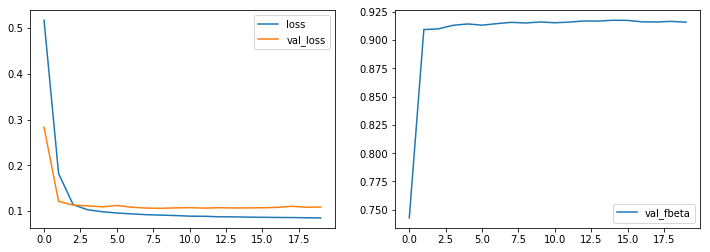

In [401]:
scores = []
scores_per_class = []
batch_size = 256
epochs = 50
esp = 10

def get_scores_per_class(Y_valid, pred):
    spc = []
    for i in range(17):
        spc.append(fbeta_score(Y_valid[:,i], (pred[:,i] > 0.2).astype(int), beta=2))
    return spc

def my_callback_func(batch,logs):
    pred = model.predict(features_valid, batch_size=batch_size,verbose=2)
    scores.append(fbeta_score(Y_valid, (pred > 0.2).astype(int), beta=2, average='samples'))
    scores_per_class.append(get_scores_per_class(Y_valid, pred))


my_callback = LambdaCallback(on_epoch_end=lambda batch,logs: my_callback_func(batch,logs))
early_stop = EarlyStopping(monitor='val_loss', patience=esp, verbose=0)
callbacks = [my_callback, early_stop]
# callbacks = [my_callback]

history_callback = model.fit(features_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=2,
          validation_data=(features_valid, Y_valid), callbacks=callbacks)

print("Max score %f at epoch %d" % (np.max(scores), np.argmax(scores)))
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])
plt.legend(labels=['loss', 'val_loss'])
plt.subplot(1, 2, 2)
plt.plot(scores)
plt.legend(labels=['val_fbeta'])
plt.show()

In [402]:
df_scores = pd.DataFrame(index=range(len(labels)), columns=['label', 'max_score', 'epoch'])
for i in inv_label_map:
    spc = np.array(scores_per_class)[:,i]
    df_scores.label[i] = inv_label_map[i]
    df_scores.max_score[i] = spc.max()
    df_scores.epoch[i] = spc.argmax()+1
df_scores

,label,max_score,epoch
0,slash_burn,0.0463758,1
1,clear,0.977586,5
2,blooming,0.136519,19
3,primary,0.990313,13
4,cloudy,0.876238,12
5,conventional_mine,0.1,20
6,water,0.768699,2
7,haze,0.75448,19
8,cultivation,0.67252,16
9,partly_cloudy,0.933511,17


In [403]:
# p_optimal = np.empty(Y_valid.shape)
# for i in range(17):
#     p_optimal[:,i] = predictions[df_scores.epoch[i] - 1][:,i]
# fbeta_score(Y_valid, (p_optimal > 0.2).astype(int), beta=2, average='samples')

In [404]:
# df_scores = pd.DataFrame(index=range(len(labels)+1), columns=['label', 'max_score', 'epoch'])
# for i in inv_label_map:
#     spc = np.array(scores_per_class)[:,i]
#     df_scores.label[i] = inv_label_map[i]
#     df_scores.max_score[i] = spc.max()
#     df_scores.epoch[i] = spc.argmax()+1
# spc = np.array(scores_per_class)[:,17]
# df_scores.label[17] = 'watter|road'
# df_scores.max_score[17] = spc.max()
# df_scores.epoch[17] = spc.argmax()+1
# # spc = np.array(scores_per_class)[:,18]
# # df_scores.label[18] = 'watter&road'
# # df_scores.max_score[18] = spc.max()
# # df_scores.epoch[18] = spc.argmax()+1
    
# df_scores

In [408]:
# def find_ratio(y_true, y_pred):
#     step = 0.01
#     max_score = 0
#     best_r = step
#     n = int(1/step)
#     r = step
#     for i in range(n):
#         score = fbeta_score(y_true, (y_pred > r).astype(int), beta=2)
#         if score > max_score:
#             max_score = score
#             best_r = r
#         r+=step

#     return best_r, max_score

# p_valid = model.predict(features_valid, batch_size=batch_size,verbose=2)
# best_ratio, score = find_ratio(Y_valid[:,column], p_valid)
# print("Max score of %f was obtained by ratio %f" % (score, best_ratio))

In [409]:
def plot_data_2(data, y, x_min, x_max, y_min, y_max, tag, title=""):
    target_names = ['not %s' % tag, tag]
    negative_class = data[y==0,:]
    positive_class = data[y==1,:]

    # apply constraints
    negative_class = negative_class[negative_class[:,0]<x_max]
    negative_class = negative_class[negative_class[:,0]>x_min]
    negative_class = negative_class[negative_class[:,1]<y_max]
    negative_class = negative_class[negative_class[:,1]>y_min]
    positive_class = positive_class[positive_class[:,0]<x_max]
    positive_class = positive_class[positive_class[:,0]>x_min]
    positive_class = positive_class[positive_class[:,1]<y_max]
    positive_class = positive_class[positive_class[:,1]>y_min]
    lw = 2
    plt.scatter(negative_class[:,0], negative_class[:,1], color=colors[0], alpha=.8, lw=lw, label=target_names[0], s=1)
    plt.scatter(positive_class[:,0], positive_class[:,1], color=colors[1], alpha=.8, lw=lw, label=target_names[1], s=1)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('%s of %s dataset' % (title, tag))

In [410]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [411]:
pca = PCA(n_components=2)
X_r = pca.fit(features_valid).transform(features_valid)

In [412]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.49633082  0.09881118]


In [427]:
X_r[:,0].max()

862221.3334858336

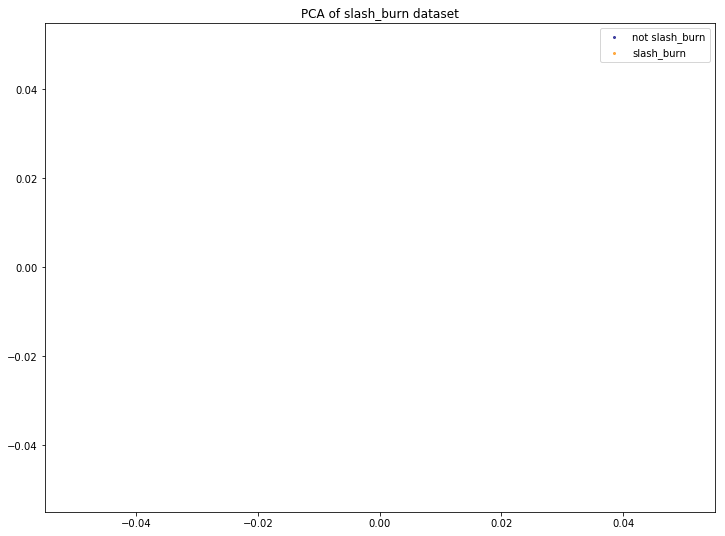

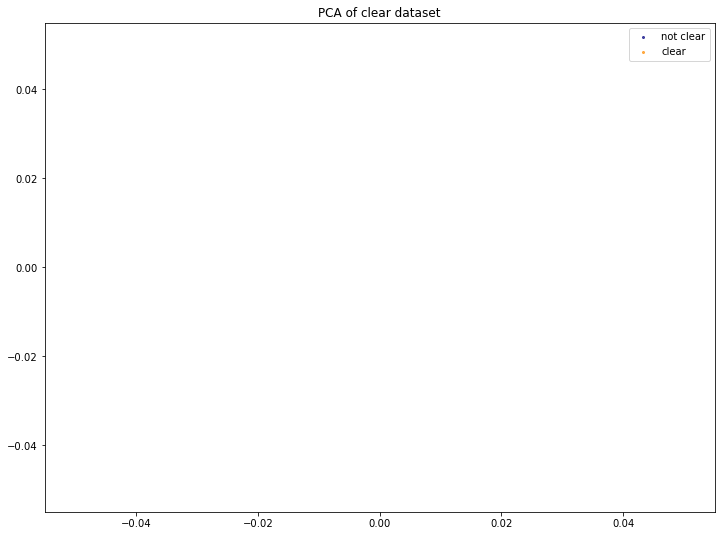

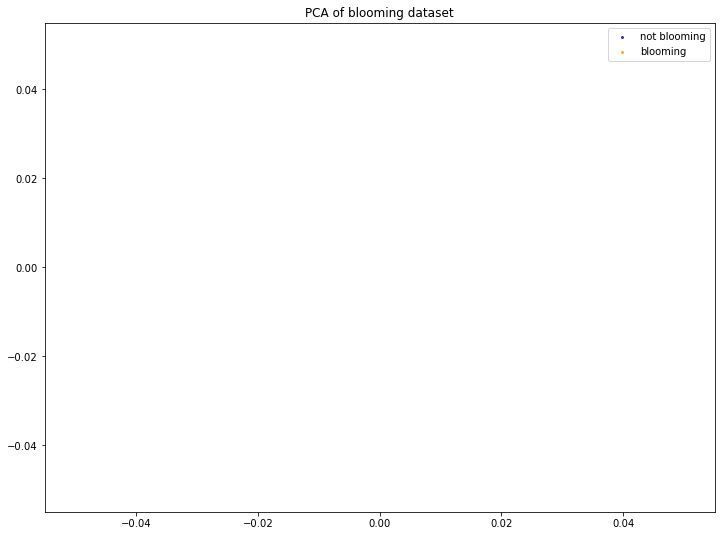

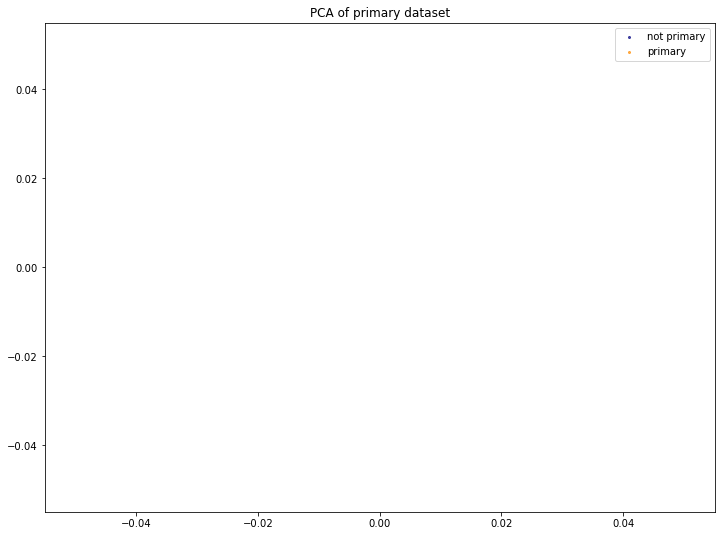

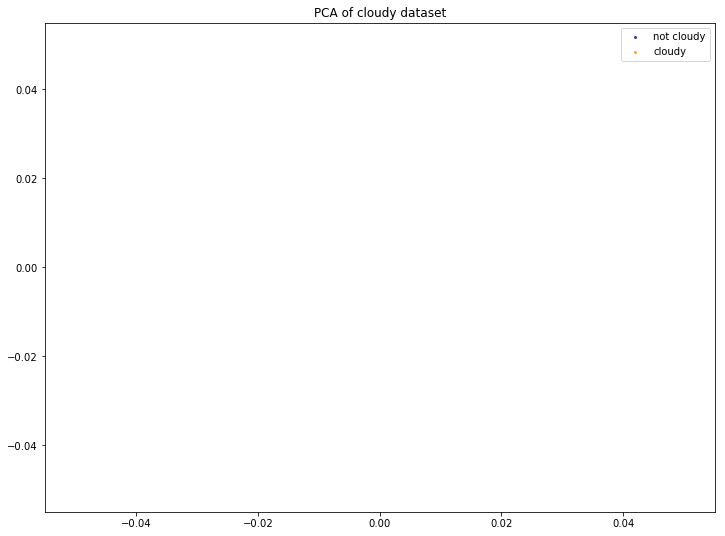

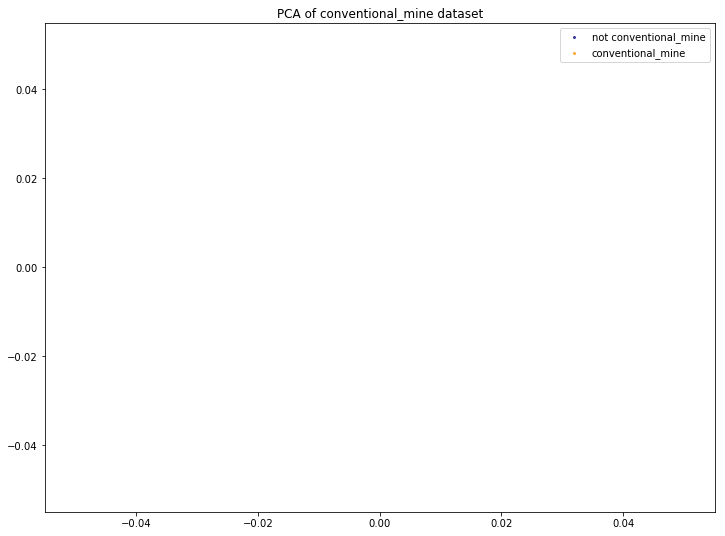

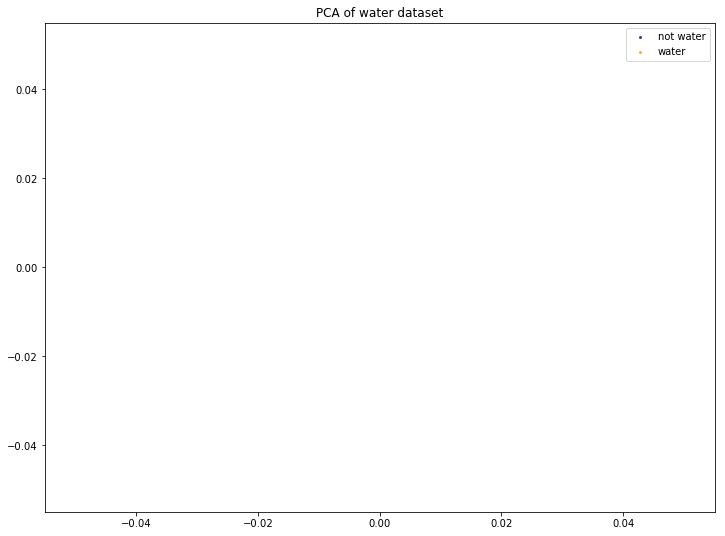

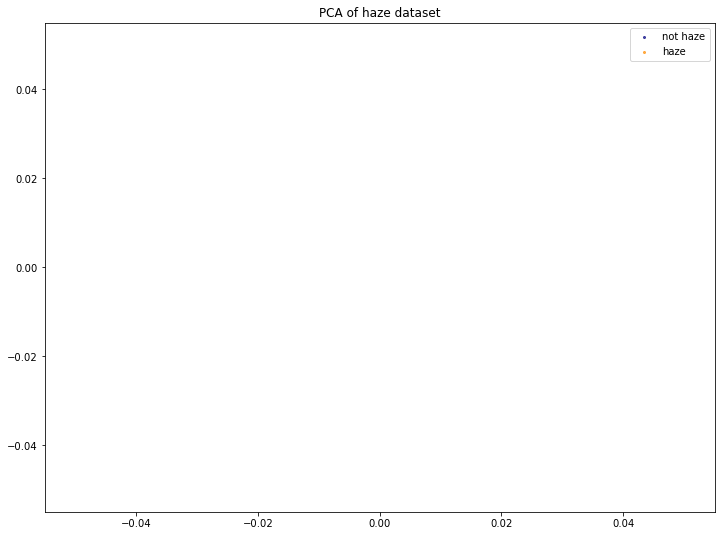

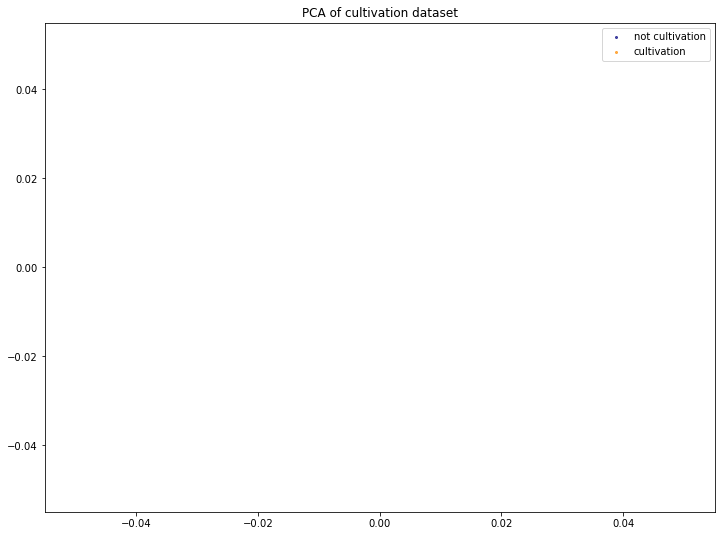

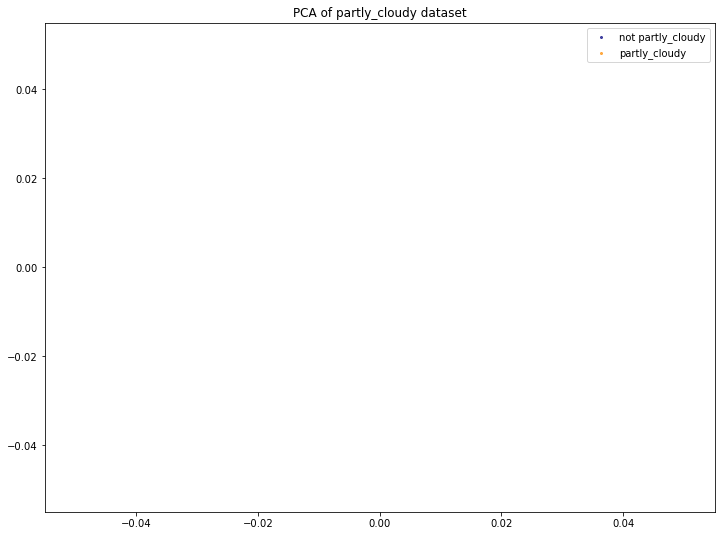

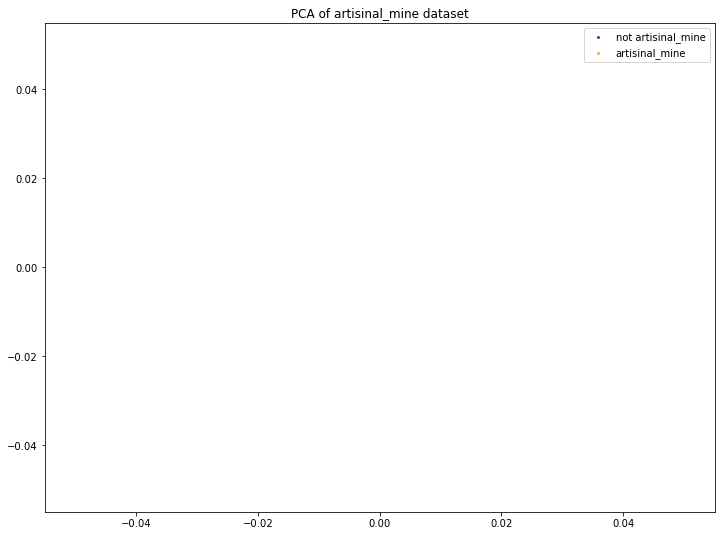

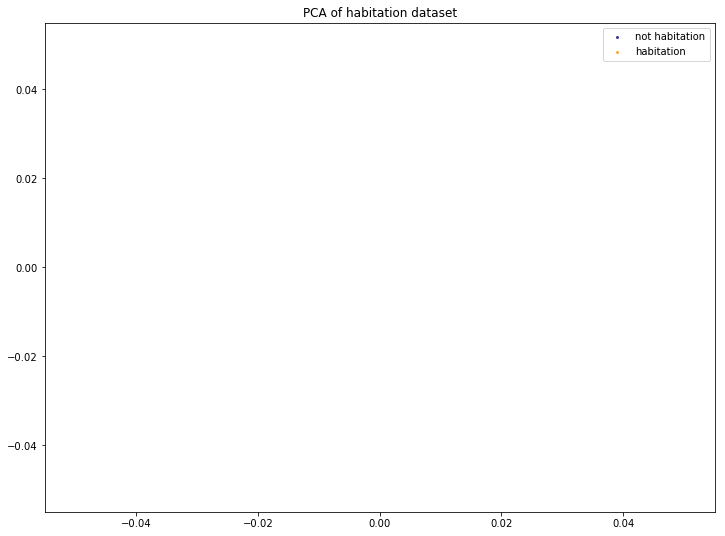

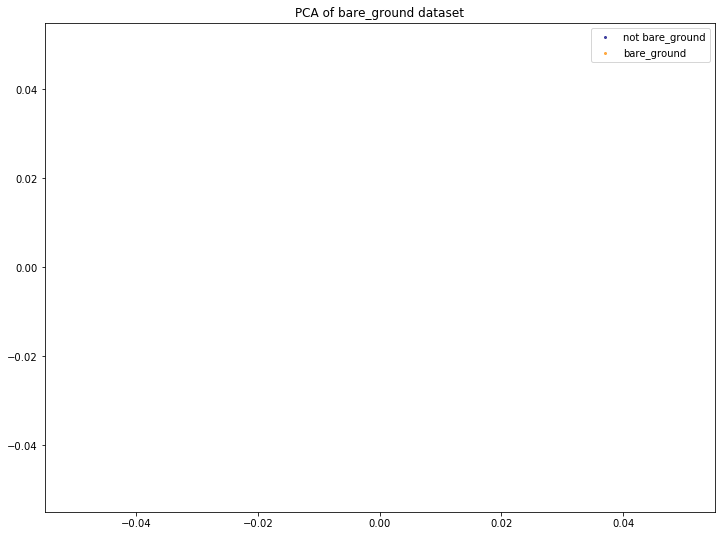

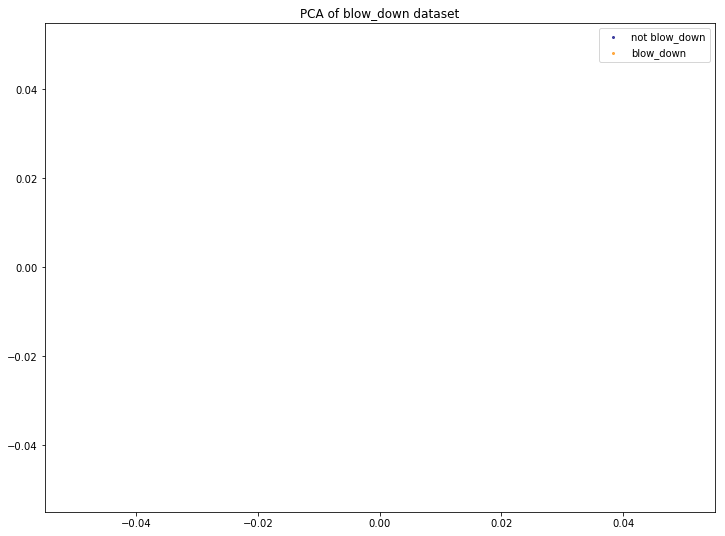

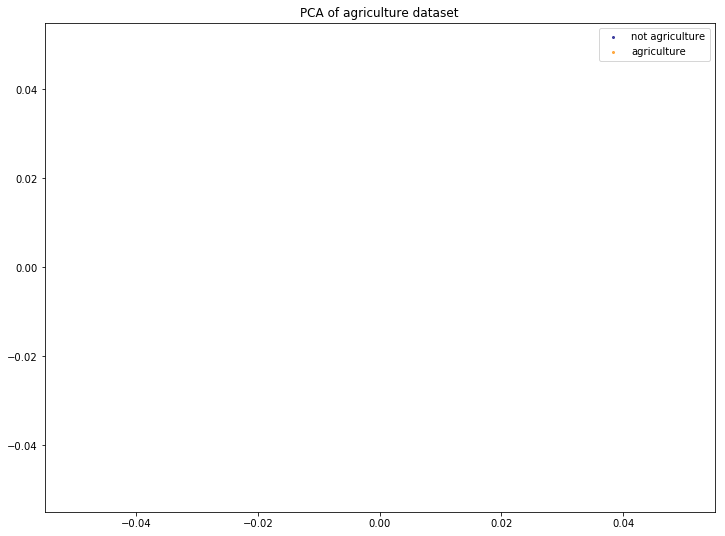

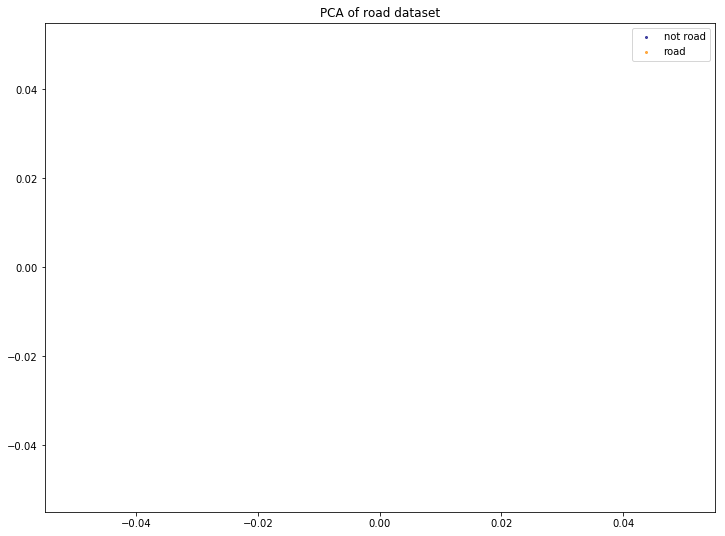

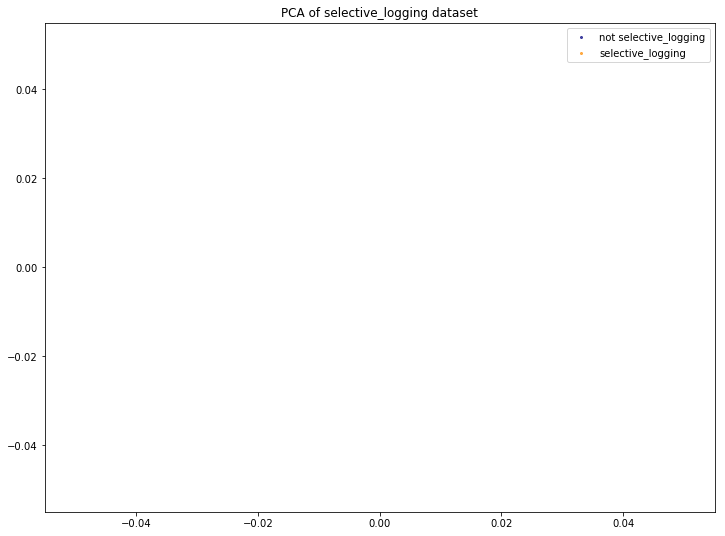

In [425]:
x_min = -100
y_min = -100
x_max = 200
y_max = 200
for column in range(17):
    y_target = Y_valid[:,column]
    plot_data_2(X_r, y_target, x_min, x_max, y_min, y_max, inv_label_map[column], title='PCA')
    plt.show()

In [414]:
n_neighbors = 17
# Perform Isomap Manifold learning.
t0 = time()
trans_data = manifold.Isomap(n_neighbors, n_components=2, n_jobs=-1)\
    .fit_transform(features_valid).T
t1 = time()
print("%s: %.2g sec" % ('ISO', t1 - t0))

ISO: 60 sec


In [ ]:
data = np.transpose(trans_data)
x_min = -20
y_min = -20
x_max = 20
y_max = 20
for column in range(17):
    y_target = Y_valid[:,column]
    plot_data_2(data, y_target, x_min, x_max, y_min, y_max, inv_label_map[column], title='Isomap')
    plt.show()

In [416]:
# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(n_components=2,
                                n_neighbors=n_neighbors, n_jobs=24)
trans_data = se.fit_transform(features_valid).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

Spectral Embedding: 24 sec


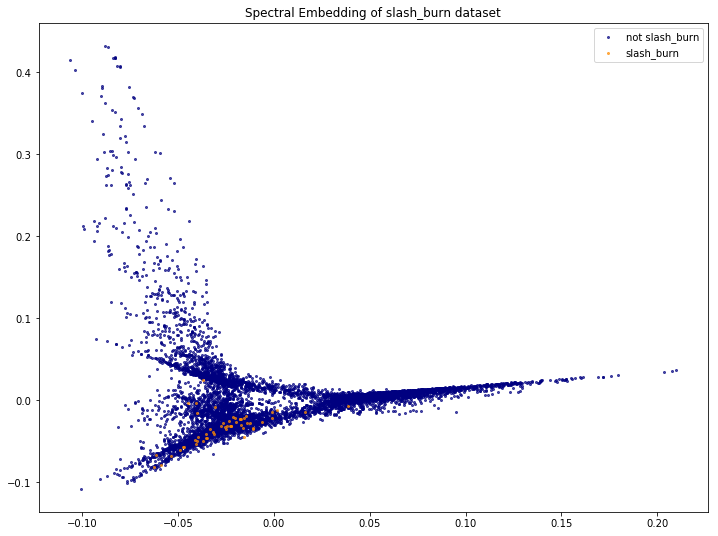

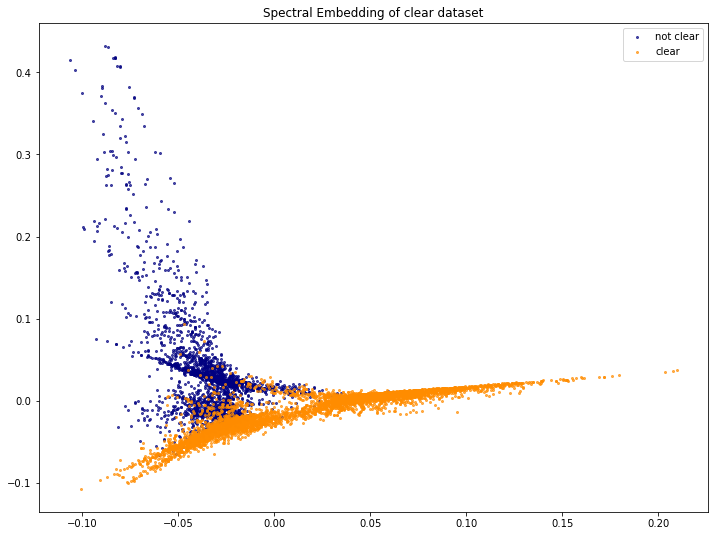

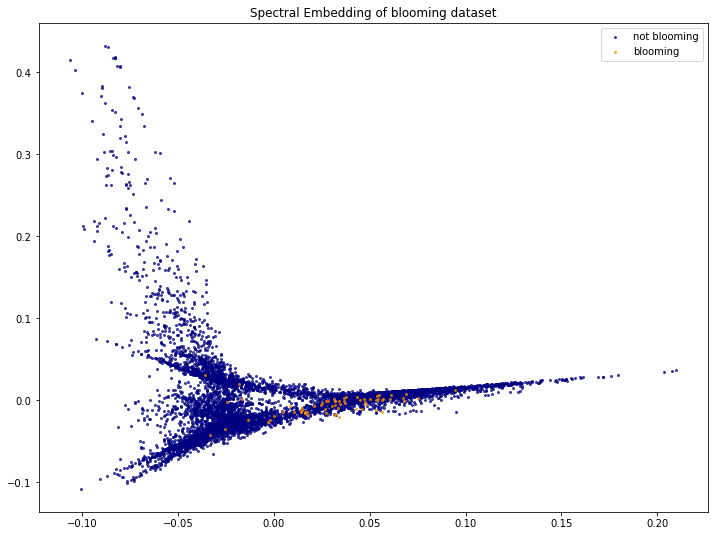

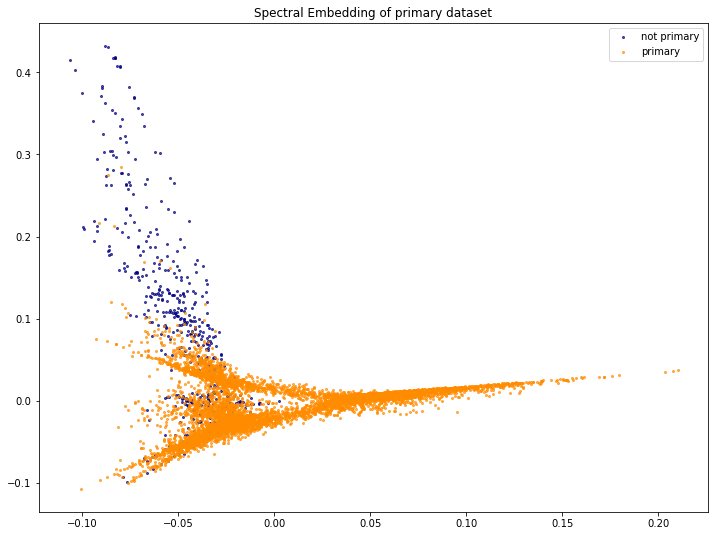

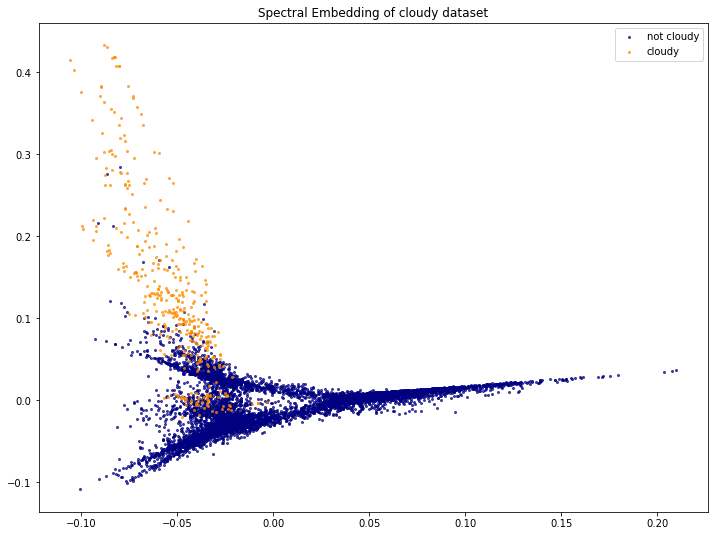

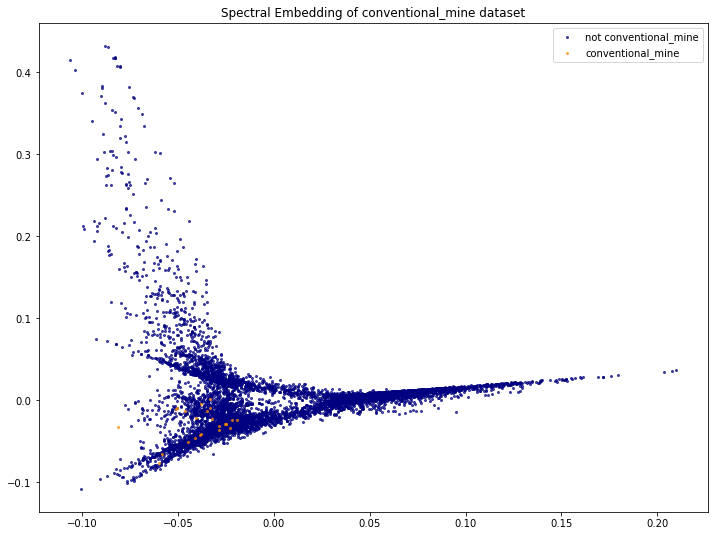

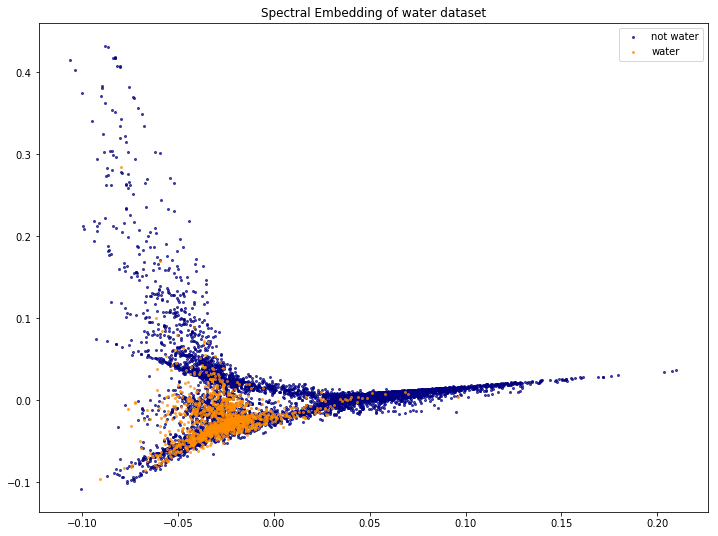

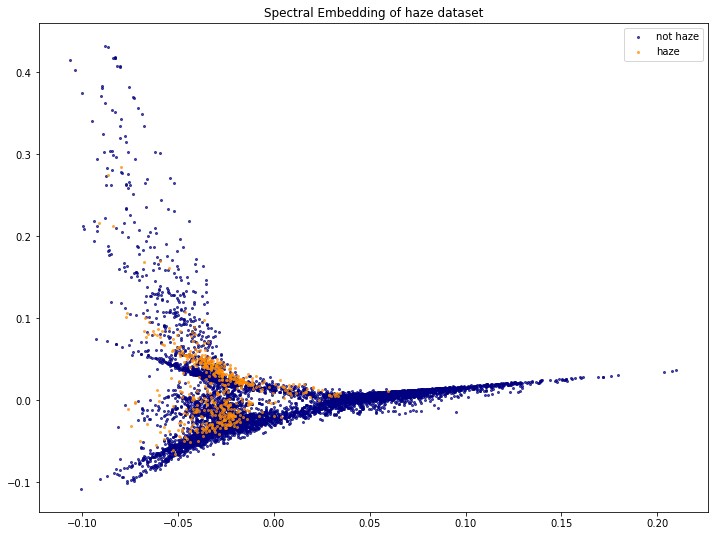

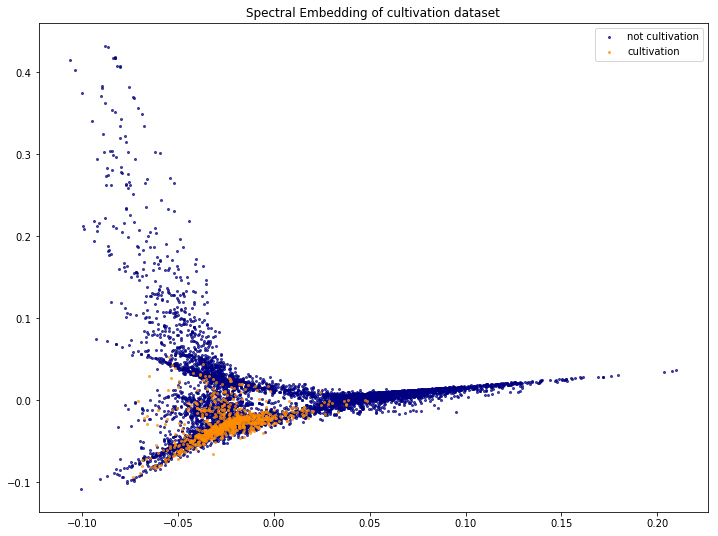

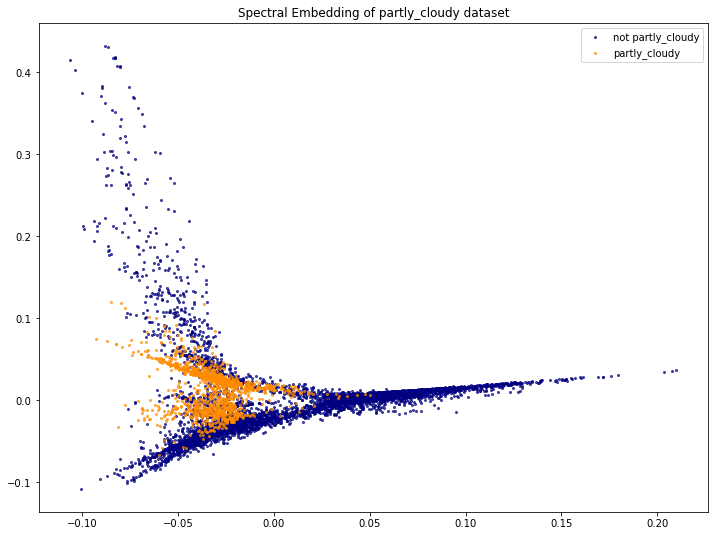

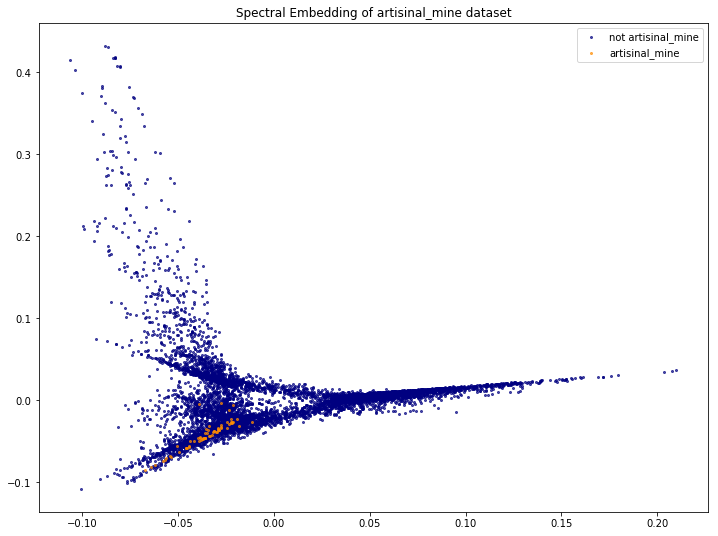

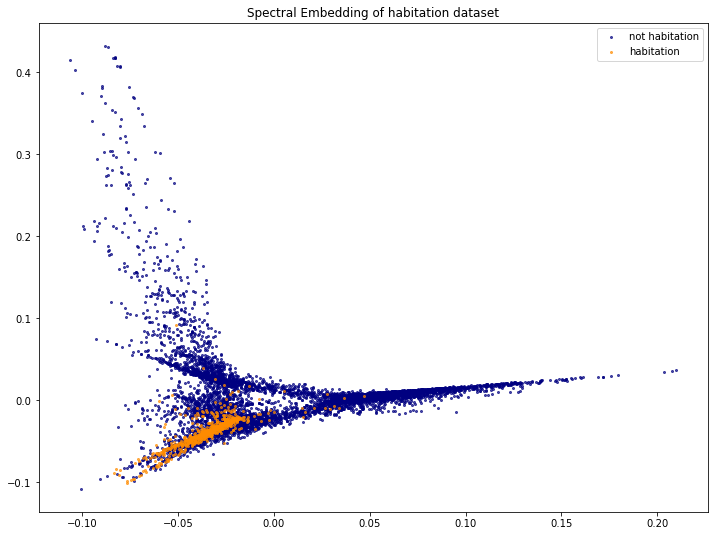

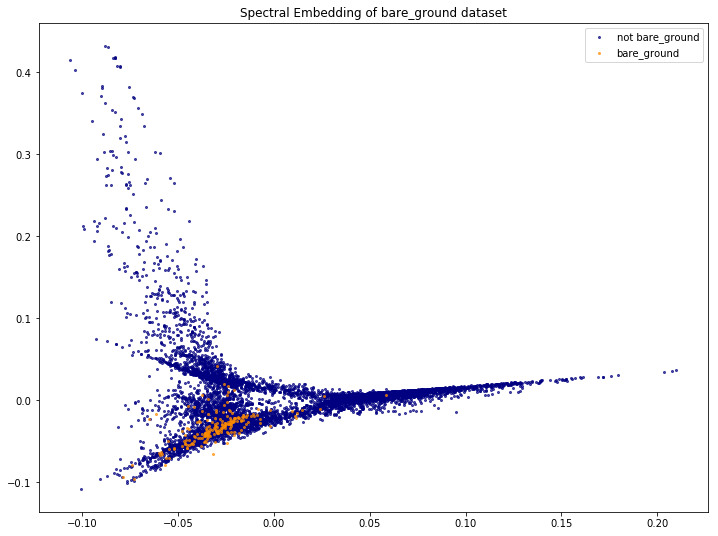

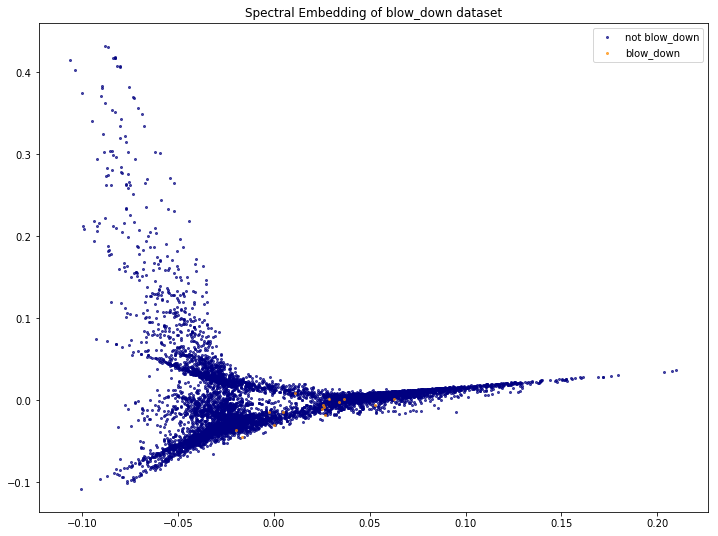

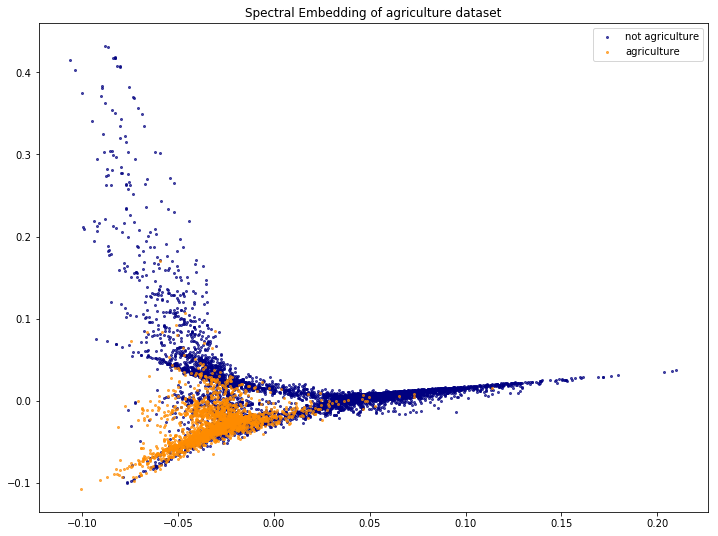

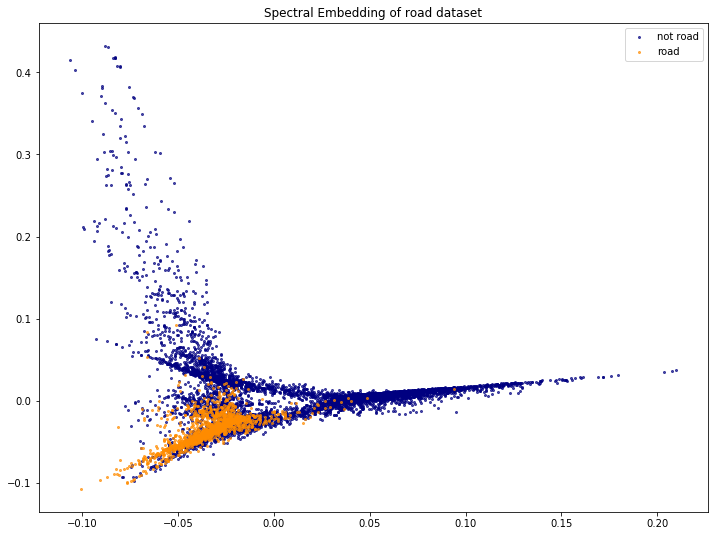

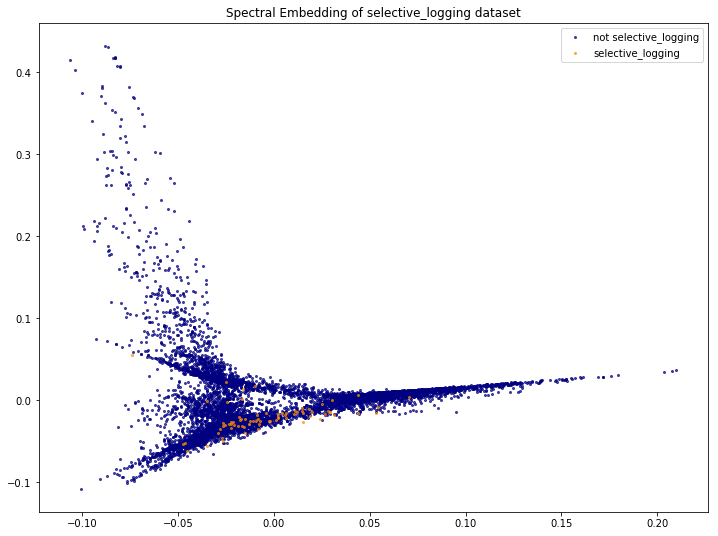

In [417]:
data = np.transpose(trans_data)
x_min = -20
y_min = -20
x_max = 20
y_max = 20
for column in range(17):
    y_target = Y_valid[:,column]
    plot_data_2(data, y_target, x_min, x_max, y_min, y_max, inv_label_map[column], title='Spectral Embedding')
    plt.show()

In [418]:
# Perform t-distributed stochastic neighbor embedding.
# t0 = time()
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
# tsne_train = tsne.fit_transform(features_train).T
# t1 = time()
# print("t-SNE: %.2g sec" % (t1 - t0))

In [419]:
# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
tsne_valid = tsne.fit_transform(features_valid).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

KeyboardInterrupt: 

In [ ]:
data = np.transpose(tsne_valid)
x_min = -20
y_min = -20
x_max = 20
y_max = 20
for column in range(17):
    y_target = Y_valid[:,column]
    plot_data_2(data, y_target, x_min, x_max, y_min, y_max, inv_label_map[column], title='t-SNE')
    plt.show()

In [ ]:
tsne_data = np.transpose(tsne_valid)
tsne_data.shape

In [ ]:
names = ["SGD logistic", "SVC"]

classifiers = [
    SGDClassifier(n_jobs=24, random_state=0, loss='hinge', n_iter=100),
#     SGDClassifier(n_jobs=24, random_state=0, loss='log', n_iter=500),
    svm.SVC()]

column = 7
X_train = X_r
X_test = X_train
y_train = Y_valid[:,column]
y_test = Y_valid[:,column]

X = X_train
# create a mesh to plot in
h = 1  # step size in the mesh
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [ ]:
for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(names[i])
    plt.show()

In [ ]:
 # iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    pred = clf.predict(X_train)
    print("f-score %f" % fbeta_score(y_test, pred, beta=2))
    plot_data_2(X_train, pred, x_min, x_max, y_min, y_max, inv_label_map[column], title=name)
    plt.show()
    
plot_data_2(X_train, y_train, x_min, x_max, y_min, y_max, inv_label_map[column], title='ground truth')
plt.show()

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
# cm = confusion_matrix(y_target=Y_valid[:,column], y_predicted=pred, binary=False)
cm = confusion_matrix(y_target=Y_valid[:,column], y_predicted=(p_valid.squeeze() > best_ratio).astype(int), binary=False)
_, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()